**Collating All Demographic, Clinical (T1, T2, T3), and Structural Data:**

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
import numpy as np

In [3]:

import seaborn as sns

In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [5]:

Clinical_Data_Clean = pd.read_excel('/Users/eastvillage/Desktop/Tapasi/Model/All Clinical (T1,T2,T3), Structural Data/EDA_Clinical_Clean.xlsx')


In [6]:
Clinical_Data_Clean = Clinical_Data_Clean.drop([0]) #removing 1st row_irrelevant
Clinical_Data_Clean = Clinical_Data_Clean.reset_index(drop = True)

**Number of participants in T1,T2,T3,T4:**

In [7]:
Sub_Num_T1 = (Clinical_Data_Clean['visit'] == 'T1').sum()
Sub_Num_T2 = (Clinical_Data_Clean['visit'] == 'T2').sum()
Sub_Num_T3 = (Clinical_Data_Clean['visit'] == 'T3').sum()
Sub_Num_T4 = (Clinical_Data_Clean['visit'] == 'T4').sum()

print("The number of subjects in T1 (baseline) = ",Sub_Num_T1)
print("The number of subjects in T2 = ",Sub_Num_T2)
print("The number of subjects in T3 = ",Sub_Num_T3)
print("The number of subjects in T4 = ",Sub_Num_T4)
print("So, we can work with 187 participants to predict T2 scores. But we later see that we can work with 185 participants only; Please follow the code.")


The number of subjects in T1 (baseline) =  212
The number of subjects in T2 =  187
The number of subjects in T3 =  159
The number of subjects in T4 =  21
So, we can work with 187 participants to predict T2 scores. But we later see that we can work with 185 participants only; Please follow the code.


**Keeping only relevant columns and rows:**

In [8]:
Clinical_Data_Clean = Clinical_Data_Clean[['src_subject_id', 'interview_age', 'sex', 'Major Depression Total Score', 'Social Phobia Total Score', 'Panic Disorder Total Score', 'Separation Anxiety Total Score', 'Generalized Anxiety Total Score', 'Obsessive_Compulsive Total Score', 'Total Anxiety Score', 'Total Internalizing Score', 'visit']]


In [12]:
#Separating dataset with T2, T3

Clinical_Data_Clean_for_T3 = Clinical_Data_Clean.loc[Clinical_Data_Clean["visit"] != 'T4']
Clinical_Data_Clean_for_T3 = Clinical_Data_Clean_for_T2.reset_index(drop = True)


In [13]:
Initial_sub_num = len(Clinical_Data_Clean_for_T3)
Initial_sub_num

558

In [30]:
#Removing the participants without T2 scores from the T2 dataset:

Sub_with_T1 = Clinical_Data_Clean_for_T2['src_subject_id'].loc[Clinical_Data_Clean_for_T2["visit"] == 'T1' ]
Sub_with_T2 = Clinical_Data_Clean_for_T2['src_subject_id'].loc[Clinical_Data_Clean_for_T2["visit"] == 'T2' ]

src_key_with_T2 = [] #Making a list of src keys of partcipants with T2 scores
for i in range(0, len(Sub_with_T2)):
    
    src_key_with_T2.append(Sub_with_T2.iloc[i])
    
row_indices_with_T1_but_no_T2 = [] #No T2

for i in range(0,len(Sub_with_T1)):
    
    if ~Sub_with_T1.isin(src_key_with_T2)[i]:
        
        row_indices_with_T1_but_no_T2.append(i)

Clinical_Data_Clean_for_T2 = Clinical_Data_Clean_for_T2.drop(row_indices_with_T1_but_no_T2)
Clinical_Data_Clean_for_T2 = Clinical_Data_Clean_for_T2.reset_index(drop = True)


print("The number of participants who have T2 scores but don't have T1 scores is",len(row_indices_with_T1_but_no_T2),"and thus, we neeed to drop these rows.")
    

The number of participants who have T1 scores but don't have T2 scores is 27 and thus, we neeed to drop these rows.


**Explanation:**

The number of participants with T1 scores is 212, and the number of participants with T2 scores is 187. Though it may apprear that there are (212 - 187 = ) 25 participants who have T2 scores but don't have T1 scores, there are actually 27 participants who have T2 scores but don't have T1 scores (determined by the above cell). This can be explained by the fact that participicants with src keys BANDA204 and BANDA214 have T2 scores but don't have T1 scores (determined by the cell below). 

In [31]:
#Explanation and removing additional 2 rows

Sub_with_T1 = Clinical_Data_Clean_for_T2['src_subject_id'].loc[Clinical_Data_Clean_for_T2["visit"] == 'T1' ]
Sub_with_T2 = Clinical_Data_Clean_for_T2['src_subject_id'].loc[Clinical_Data_Clean_for_T2["visit"] == 'T2' ]

src_key_with_T1 = [] ##Making a list of src keys of partcipants with T1 scores
for i in range(0, len(Sub_with_T1)):
    
    src_key_with_T1.append(Sub_with_T1.iloc[i])
    
row_indices_with_T2_but_no_T1 = [] #No T1

for i in range(0,len(Sub_with_T2)):
    
    if Sub_with_T2.isin(src_key_with_T1).iloc[i] == False:
        
        row_indices_with_T2_but_no_T1.append(i+len(Sub_with_T1))
        print(Sub_with_T2.iloc[i])
        
Clinical_Data_Clean_for_T2 = Clinical_Data_Clean_for_T2.drop(row_indices_with_T2_but_no_T1)
Clinical_Data_Clean_for_T2 = Clinical_Data_Clean_for_T2.reset_index(drop = True)

print("The number of participants who have T2 scores but don't have T1 scores is",len(row_indices_with_T2_but_no_T1),"and thus, we neeed to drop these rows.")


BANDA204
BANDA214
The number of participants who have T2 scores but don't have T1 scores is 2 and thus, we neeed to drop these rows.


In [32]:
#Final number of participants

Sub_Num_T1_after_cleaning = (Clinical_Data_Clean_for_T2['visit'] == 'T1').sum()
Sub_Num_T2_after_cleaning = (Clinical_Data_Clean_for_T2['visit'] == 'T2').sum()

print("After removing",len(row_indices_with_T1_but_no_T2) + len(row_indices_with_T2_but_no_T1),"participants from the initial number of",Initial_sub_num,"participants, we have",len(Clinical_Data_Clean_for_T2),"participants with",Sub_Num_T1_after_cleaning,"participants having T1 scores, and the same",Sub_Num_T2_after_cleaning,"participants having T2 scores also.")



After removing 29 participants from the initial number of 399 participants, we have 370 participants with 185 participants having T1 scores, and the same 185 participants having T2 scores also.


**Rearranging T2 scores in the dataframe:**

In [33]:
T2_Major_Depression = np.array(Clinical_Data_Clean_for_T2['Major Depression Total Score'][(Clinical_Data_Clean_for_T2['visit'] == 'T2')])

T2_Social_Phobia = np.array(Clinical_Data_Clean_for_T2['Social Phobia Total Score'][(Clinical_Data_Clean_for_T2['visit'] == 'T2')])

T2_Panic_Disorder = np.array(Clinical_Data_Clean_for_T2['Panic Disorder Total Score'][(Clinical_Data_Clean_for_T2['visit'] == 'T2')])

T2_Separation_Anxiety = np.array(Clinical_Data_Clean_for_T2['Separation Anxiety Total Score'][(Clinical_Data_Clean_for_T2['visit'] == 'T2')])

T2_Generalized_Anxiety = np.array(Clinical_Data_Clean_for_T2['Generalized Anxiety Total Score'][(Clinical_Data_Clean_for_T2['visit'] == 'T2')])

T2_Obsessive_Compulsive = np.array(Clinical_Data_Clean_for_T2['Obsessive_Compulsive Total Score'][(Clinical_Data_Clean_for_T2['visit'] == 'T2')])

T2_Total_Anxiety = np.array(Clinical_Data_Clean_for_T2['Total Anxiety Score'][(Clinical_Data_Clean_for_T2['visit'] == 'T2')])

T2_Total_Internalizing = np.array(Clinical_Data_Clean_for_T2['Total Internalizing Score'][(Clinical_Data_Clean_for_T2['visit'] == 'T2')])

T2_Interview_Age = np.array(Clinical_Data_Clean_for_T2['interview_age'][(Clinical_Data_Clean_for_T2['visit'] == 'T2')])


In [34]:
Clinical_Data_Clean_for_T2 = Clinical_Data_Clean_for_T2.loc[Clinical_Data_Clean_for_T2["visit"] == 'T1' ]

T2_Columns = [T2_Interview_Age, T2_Major_Depression, T2_Social_Phobia, T2_Panic_Disorder, T2_Separation_Anxiety, T2_Generalized_Anxiety, T2_Obsessive_Compulsive, T2_Total_Anxiety, T2_Total_Internalizing]
T2_Add_Column_Names = ['Interview Age for T2', 'Major Depression Total Score for T2', 'Social Phobia Total Score for T2', 'Panic Disorder Total Score for T2', 'Separation Anxiety Total Score for T2', 'Generalized Anxiety Total Score for T2', 'Obsessive_Compulsive Total Score for T2', 'Total Anxiety Score for T2', 'Total Internalizing Score for T2']
   

for i in range(0, len(T2_Columns)):#For 6 subscales, Total Anxiety, Total Internalizing
    
    Scale = T2_Columns[i]
    Scale_Name = T2_Add_Column_Names[i]
    Clinical_Data_Clean_for_T2[Scale_Name] = Scale
    

In [35]:
Clinical_Data_Clean_for_T2 = Clinical_Data_Clean_for_T2.rename(columns={'interview_age': 'Interview Age for T1', 'Major Depression Total Score': 'Major Depression Total Score for T1', 'Major Depression Total Score': 'Major Depression Total Score for T1', 'Social Phobia Total Score': 'Social Phobia Total Score for T1', 'Panic Disorder Total Score': 'Panic Disorder Total Score for T1', 'Separation Anxiety Total Score': 'Separation Anxiety Total Score for T1', 'Generalized Anxiety Total Score': 'Generalized Anxiety Total Score for T1', 'Obsessive_Compulsive Total Score': 'Obsessive_Compulsive Total Score for T1', 'Total Anxiety Score': 'Total Anxiety Score for T1', 'Total Internalizing Score': 'Total Internalizing Score for T1'})

#Swapping Sex and Interview Age for T1 columns

swap_list = ["src_subject_id","sex","Interview Age for T1","Major Depression Total Score for T1","Social Phobia Total Score for T1","Panic Disorder Total Score for T1","Separation Anxiety Total Score for T1","Generalized Anxiety Total Score for T1","Obsessive_Compulsive Total Score for T1","Total Anxiety Score for T1","Total Internalizing Score for T1","visit",'Interview Age for T2', 'Major Depression Total Score for T2', 'Social Phobia Total Score for T2', 'Panic Disorder Total Score for T2', 'Separation Anxiety Total Score for T2', 'Generalized Anxiety Total Score for T2', 'Obsessive_Compulsive Total Score for T2', 'Total Anxiety Score for T2', 'Total Internalizing Score for T2']

Clinical_Data_Clean_for_T2 = Clinical_Data_Clean_for_T2.reindex(columns=swap_list)

Clinical_Data_Clean_for_T2 = Clinical_Data_Clean_for_T2.drop(['visit'], axis=1)


In [36]:
#Creating Dummy Variable for sex

Female_Dummy = np.array(pd.get_dummies(Clinical_Data_Clean_for_T2['sex'])['F'])

Clinical_Data_Clean_for_T2.insert(3, 'Female', Female_Dummy)

Clinical_Data_Clean_for_T2 = Clinical_Data_Clean_for_T2.drop(['sex'], axis=1)

In [37]:
#Saving Clean Data as Excel
Clinical_Data_Clean_for_T2.to_excel('/Users/eastvillage/Desktop/Tapasi/Model/Clinical_Data_Clean_for_T2.xlsx')

In [19]:
Clinical_Data_Clean_for_T2.columns

Index(['src_subject_id', 'Interview Age for T1', 'Female',
       'Major Depression Total Score for T1',
       'Social Phobia Total Score for T1', 'Panic Disorder Total Score for T1',
       'Separation Anxiety Total Score for T1',
       'Generalized Anxiety Total Score for T1',
       'Obsessive_Compulsive Total Score for T1', 'Total Anxiety Score for T1',
       'Total Internalizing Score for T1', 'Interview Age for T2',
       'Major Depression Total Score for T2',
       'Social Phobia Total Score for T2', 'Panic Disorder Total Score for T2',
       'Separation Anxiety Total Score for T2',
       'Generalized Anxiety Total Score for T2',
       'Obsessive_Compulsive Total Score for T2', 'Total Anxiety Score for T2',
       'Total Internalizing Score for T2'],
      dtype='object')

**Modeling:**

In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
#Collating Features (Predictors and output)

input_columns = [11,2,3]

col = Clinical_Data_Clean_for_T2.columns[input_columns]

features = []

for i in range(len(col)):
    
    features.append(col[i])
    

In [21]:
#Defining target

df_target = np.array(Clinical_Data_Clean_for_T2['Major Depression Total Score for T2'])
df_target.shape

(185,)

In [22]:
#Defining Predictors

df_data = np.array(Clinical_Data_Clean_for_T2.loc[:,features].values)
df_data.shape

(185, 3)

In [23]:
#Train-Test Split
from sklearn.model_selection import train_test_split

train_data, test_data, train_lbl, test_lbl = train_test_split(df_data, df_target, test_size=1/5, random_state=0)

In [82]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

train_data = StandardScaler().fit_transform(train_data)

test_data = StandardScaler().fit_transform(test_data)

In [25]:
#Before PCA: For Scatter plot

train_data_before_PCA = train_data
test_data_before_PCA = test_data

In [26]:
#PCA

from sklearn.decomposition import PCA

pca = PCA(.95)

pca.fit(train_data)

pca.n_components_

3

In [27]:
eigenvectors = pca.components_

# get the weightage of each variable in each principal component
for i in range(len(eigenvectors)):
        
    print("Weightage of", Clinical_Data_Clean_for_T2.columns[input_columns[0]],",",Clinical_Data_Clean_for_T2.columns[input_columns[1]],",",Clinical_Data_Clean_for_T2.columns[input_columns[2]], f"in principal component {i+1}: {eigenvectors[i]}", "respectively.")
        

Weightage of Interview Age for T2 , Female , Major Depression Total Score for T1 in principal component 1: [-0.56996851 -0.56413925 -0.59739668] respectively.
Weightage of Interview Age for T2 , Female , Major Depression Total Score for T1 in principal component 2: [ 0.67238661 -0.73811584  0.05550904] respectively.
Weightage of Interview Age for T2 , Female , Major Depression Total Score for T1 in principal component 3: [-0.47226278 -0.37004313  0.80002247] respectively.


[Text(0.5, 23.52222222222222, 'Predictors'),
 Text(50.722222222222214, 0.5, 'Principal Components'),
 [Text(0.5, 0, 'Interview Age for T2'),
  Text(1.5, 0, 'Female'),
  Text(2.5, 0, 'Major Depression Total Score for T1')],
 Text(0.5, 1.0, 'Weightage of Variables in Principal Components')]

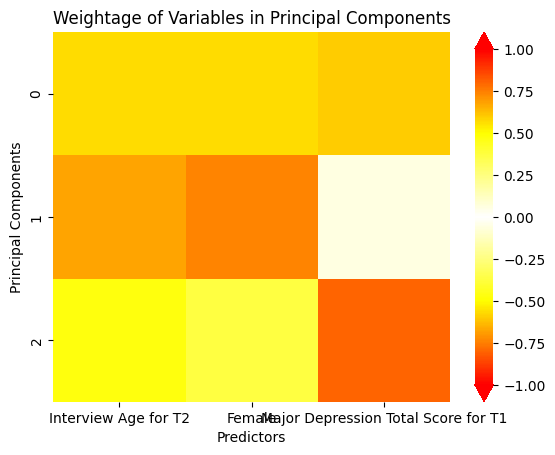

In [28]:
#Visualization of Weightage of Variables in Principal Components:

import matplotlib.colors as mcolors

colors = [(1, 0, 0), (1, 1, 0),(1, 1, 1), (1,1,0),(1, 0, 0)]
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
s_eigen = sns.heatmap(eigenvectors, cmap=cmap, vmin=-1, vmax=1, center=0, cbar_kws={'extend':'both'})   
s_eigen.set(xlabel = "Predictors", ylabel = "Principal Components", xticklabels = col, title = "Weightage of Variables in Principal Components")


In [29]:
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

In [24]:
#Ridge Regression

from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.00)

In [25]:
#Cross Validation

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

for train_index, val_index in kf.split(train_data):
    # Split the training data into training and validation sets for this fold
    X_fold_train, y_fold_train = train_data[train_index], train_lbl[train_index]
    X_fold_val, y_fold_val = train_data[val_index], train_lbl[val_index]
    
    # Train ridge regression model on the training set
    
    rr.fit(X_fold_train, y_fold_train)
    
    # Predict on the validation set and compute the mean squared error
    y_pred_val = rr.predict(X_fold_val)
    mse = mean_squared_error(y_fold_val, y_pred_val)
    mse_scores.append(mse)

# Compute the mean and standard deviation of the mean squared errors across all folds
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print("Mean squared error: {:.2f} +/- {:.2f}".format(mean_mse, std_mse))


Mean squared error: 16.26 +/- 6.35


In [26]:
#Grid Search to find best Alpha

from sklearn.model_selection import GridSearchCV

grid = dict()
grid['alpha'] = np.arange(0, 10, 0.01)

search = GridSearchCV(rr, grid, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

results = search.fit(train_data, train_lbl)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.025
Config: {'alpha': 9.99}


In [27]:
#Final Validation: R squared

rr_fit = rr.fit(train_data, train_lbl)
rr_fit.score(test_data, test_lbl)

R2 = rr_fit.score(test_data, test_lbl)
print("R squared: ", R2)

R squared:  0.31565303070359463


In [28]:
#Final Validation: MSE

from sklearn.metrics import mean_squared_error

pred = rr_fit.predict(test_data)
mse = mean_squared_error(test_lbl, pred) 
rmse = np.sqrt(mean_squared_error(test_lbl,pred))

print("Root mean Squared Error: ", rmse)

Root mean Squared Error:  5.763121803741145


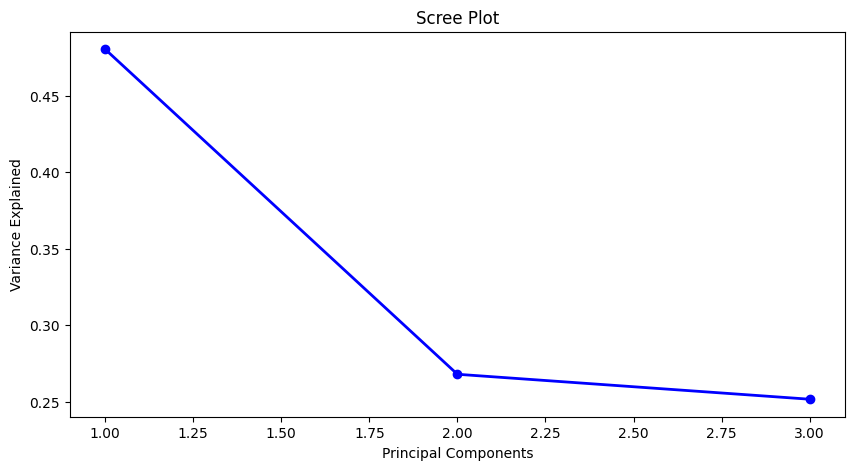

In [35]:
#Scree Plot: Variance expalined by principal components

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 5]

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [36]:
#Permutation Test

RMSE_both_array = []
R2_permutations = []

df2 = Clinical_Data_Clean_for_T2.copy()

input_columns = [11,2,3]

for i in range(1000):
    #df2 = Clinical_Data_Clean_for_T2.apply(lambda x: x.sample(frac=1).values)
    
    col = df2.columns[input_columns]

    features= []

    for i in range(len(col)):
        
        features.append(col[i])
    
    df_target = np.array(df2['Major Depression Total Score for T2'])
    
    df_data = np.array(df2.loc[:,features].values)
    
    train_data, test_data, train_lbl, test_lbl = train_test_split( df_data, df_target, test_size=1/5, random_state=0)
    
    #Randomly shuffling the 'Major Depression Total Score for T2' column in each permutation while keeping predictor columns the same
    shuffled_idx = np.random.permutation(np.arange(len(train_lbl)))
    train_lbl = train_lbl[shuffled_idx]
    
    train_data = StandardScaler().fit_transform(train_data)

    test_data = StandardScaler().fit_transform(test_data)
    
    pca1 = PCA(.95)

    pca1.fit(train_data)
    
    train_data = pca1.transform(train_data)
    test_data = pca1.transform(test_data)
    
    rr = Ridge(alpha=0.00)
    
    #k_folds = KFold(n_splits = 10)

    #k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
    
    rr_fit = rr.fit(train_data, train_lbl)
    
    r2_permutations = rr_fit.score(test_data, test_lbl)
    
    pred = rr_fit.predict(test_data)
    mse = mean_squared_error(test_lbl, pred) 
    rmse_permutations = np.sqrt(mean_squared_error(test_lbl,pred))
    
    R2_permutations.append(r2_permutations)
    RMSE_both_array.append(rmse_permutations)
    
n_permutations = 1000
    
p_value_R2 = (np.sum(np.abs(R2_permutations) >= np.abs(R2) + 1)) / (n_permutations + 1)
if p_value_R2 == 0:
    p_value_R2 = 1 / (n_permutations + 1)
print("p-value for R2:", p_value_R2)

p_value_RMSE = (np.sum(RMSE_both_array <= rmse) + 1) / (n_permutations + 1)
if p_value_RMSE == 0:
    p_value_RMSE = 1 / (n_permutations + 1)
print("p-value for RMSE:", p_value_RMSE)


p-value for R2: 0.000999000999000999
p-value for RMSE: 0.000999000999000999


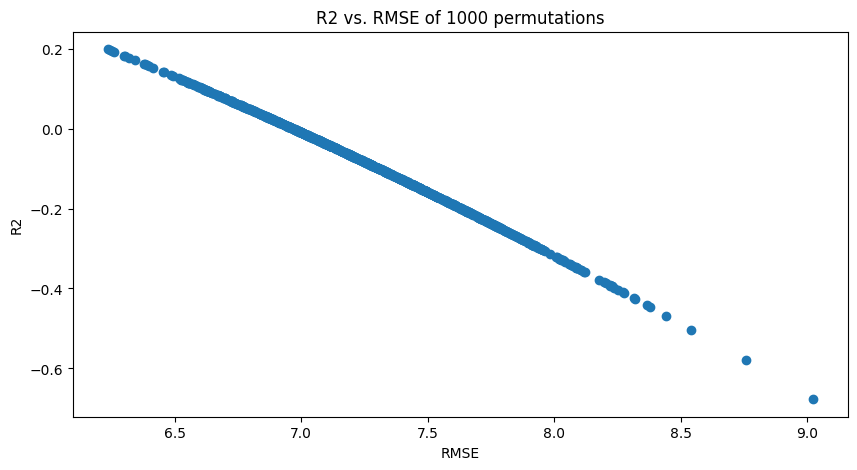

The correlation coeficient between R2 and RMSE of 1000 permutations is =  -0.9992175829283017


In [37]:
#Relationship between RMSE and R2 scores of permutations

plt.plot(RMSE_both_array,R2_permutations , 'o')

plt.xlabel("RMSE")
        
plt.ylabel("R2")
        
plt.title("R2 vs. RMSE of 1000 permutations")

plt.show()

print("The correlation coeficient between R2 and RMSE of 1000 permutations is = ",np.corrcoef(RMSE_both_array, R2_permutations)[0,1])


In [38]:
from scipy import stats

RMSE_both_array = np.array(RMSE_both_array)

stats.describe(RMSE_both_array)

DescribeResult(nobs=1000, minmax=(6.236879451151815, 9.021992770721178), mean=7.290650616422782, variance=0.1658045833403305, skewness=0.17947906825072574, kurtosis=0.06339626017065836)

In [39]:
stats.describe(R2_permutations)

DescribeResult(nobs=1000, minmax=(-0.6771260349887116, 0.19851490353171974), mean=-0.09861261377486294, variance=0.015140173029946871, skewness=-0.3515446175300205, kurtosis=0.3195101409656633)

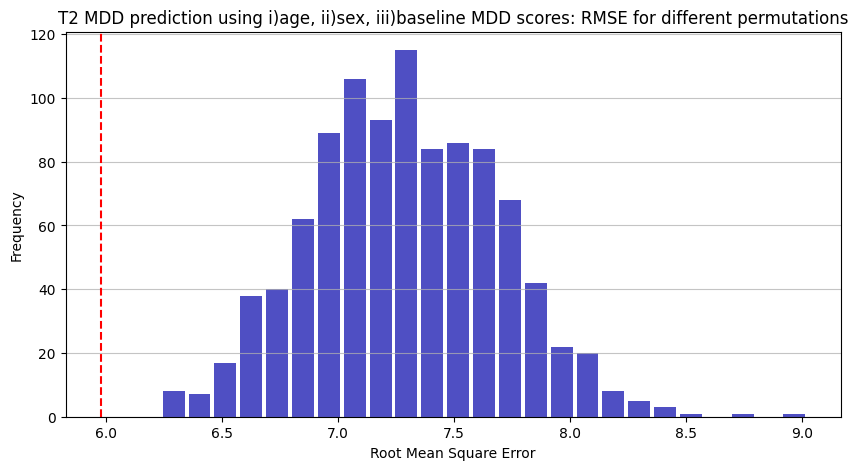

In [40]:
n, bins, patches = plt.hist(x=RMSE_both_array, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Root Mean Square Error')
plt.ylabel('Frequency')
plt.title('T2 MDD prediction using i)age, ii)sex, iii)baseline MDD scores: RMSE for different permutations')
plt.axvline(rmse, ls="--", color="r")

In [41]:
#Percentage pf permutations with RMSE less than actual RMSE

count_less_RMSE = 0
for i in range(0,len(RMSE_both_array)):
    
    if RMSE_both_array[i] < rmse:
        
        count_less_RMSE = count_less_RMSE + 1
        
print("Percentage of permutations with RMSE less than the actual RMSE is =", count_less_RMSE /len(RMSE_both_array) * 100)


Percentage of permutations with RMSE less than the actual RMSE is = 0.0


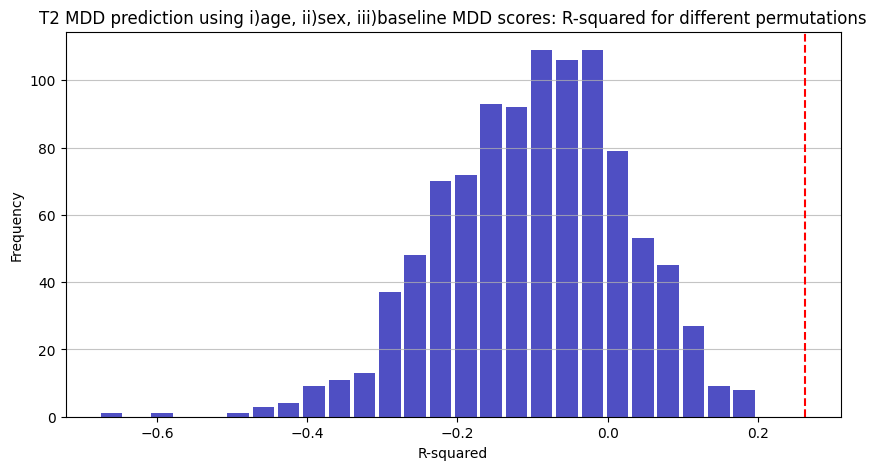

In [42]:
n, bins, patches = plt.hist(x=R2_permutations, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('R-squared')
plt.ylabel('Frequency')
plt.title('T2 MDD prediction using i)age, ii)sex, iii)baseline MDD scores: R-squared for different permutations')
plt.axvline(R2, ls="--", color="r")

In [43]:
#Percentage pf permutations with R2 greater than actual RMSE

count_greater_R2 = 0
for i in range(0,len(R2_permutations)):
    
    if R2_permutations[i] > R2:
        
        count_greater_R2 = count_greater_R2 + 1
        
print("Percentage of permutations with R-squared greater than the actual R-squared is =", count_greater_R2 /len(R2_permutations) * 100)


Percentage of permutations with R-squared greater than the actual R-squared is = 0.0


In [44]:

for i in range(0, len(pca.explained_variance_ratio_ )):
    
    print("The variance explained by PCA", i+1," is=",pca.explained_variance_ratio_ [i])

The variance explained by PCA 1  is= 0.48026380504783817
The variance explained by PCA 2  is= 0.2680165589989307
The variance explained by PCA 3  is= 0.2517196359532311


**Correlations:**

In [45]:
Clinical_Data_Clean_for_T2_for_corr = Clinical_Data_Clean_for_T2.drop(['Interview Age for T2'], axis=1)

In [46]:
Clinical_Data_Clean_for_T2_for_corr.columns

Index(['src_subject_id', 'Interview Age for T1', 'Female',
       'Major Depression Total Score for T1',
       'Social Phobia Total Score for T1', 'Panic Disorder Total Score for T1',
       'Separation Anxiety Total Score for T1',
       'Generalized Anxiety Total Score for T1',
       'Obsessive_Compulsive Total Score for T1', 'Total Anxiety Score for T1',
       'Total Internalizing Score for T1',
       'Major Depression Total Score for T2',
       'Social Phobia Total Score for T2', 'Panic Disorder Total Score for T2',
       'Separation Anxiety Total Score for T2',
       'Generalized Anxiety Total Score for T2',
       'Obsessive_Compulsive Total Score for T2', 'Total Anxiety Score for T2',
       'Total Internalizing Score for T2'],
      dtype='object')

In [47]:

# #Making all relevant columns int

# for i in range(3, len(Clinical_Data_Clean_for_T2_for_corr.columns)):
    
#     Clinical_Data_Clean_for_T2_for_corr[Clinical_Data_Clean_for_T2_for_corr.columns[i]] = Clinical_Data_Clean_for_T2[Clinical_Data_Clean_for_T2_for_corr.columns[i]].astype(int)
    
# #calculating correlations and heatmap

# import seaborn as sns 

# corr_array = np.zeros([16,16])

# for i in range(3, len(Clinical_Data_Clean_for_T2_for_corr.columns)):
    
#     for j in range(3, len(Clinical_Data_Clean_for_T2_for_corr.columns)):
        
#         corr_array[i-3,j-3] = Clinical_Data_Clean_for_T2_for_corr.iloc[:,i].corr(Clinical_Data_Clean_for_T2_for_corr.iloc[:,j])



In [48]:
#Making all relevant columns int

for i in range(3, len(Clinical_Data_Clean_for_T2_for_corr.columns)):
    
    Clinical_Data_Clean_for_T2_for_corr[Clinical_Data_Clean_for_T2_for_corr.columns[i]] = Clinical_Data_Clean_for_T2[Clinical_Data_Clean_for_T2_for_corr.columns[i]].astype(int)
    
Clinical_Data_Clean_for_T2_for_corr = Clinical_Data_Clean_for_T2_for_corr.drop(['src_subject_id', 'Interview Age for T1', 'Female'], axis = 1)

corr_array_only_scales = Clinical_Data_Clean_for_T2_for_corr.corr()


In [49]:
corr_array_only_scales

,Major Depression Total Score for T1,Social Phobia Total Score for T1,Panic Disorder Total Score for T1,Separation Anxiety Total Score for T1,Generalized Anxiety Total Score for T1,Obsessive_Compulsive Total Score for T1,Total Anxiety Score for T1,Total Internalizing Score for T1,Major Depression Total Score for T2,Social Phobia Total Score for T2,Panic Disorder Total Score for T2,Separation Anxiety Total Score for T2,Generalized Anxiety Total Score for T2,Obsessive_Compulsive Total Score for T2,Total Anxiety Score for T2,Total Internalizing Score for T2
Major Depression Total Score for T1,1.000000,0.729886,0.737627,0.647776,0.743527,0.659810,0.821324,0.897209,0.745103,0.508419,0.556321,0.488949,0.573587,0.489385,0.611284,0.667344
Social Phobia Total Score for T1,0.729886,1.000000,0.729613,0.643155,0.735144,0.576707,0.898934,0.886895,0.669623,0.762896,0.552715,0.503580,0.603701,0.412799,0.700510,0.716528
Panic Disorder Total Score for T1,0.737627,0.729613,1.000000,0.721318,0.761886,0.616070,0.904514,0.892797,0.596967,0.535135,0.713639,0.521094,0.562453,0.431217,0.659237,0.665341
Separation Anxiety Total Score for T1,0.647776,0.643155,0.721318,1.000000,0.670799,0.550104,0.812814,0.798396,0.520703,0.495533,0.519741,0.663487,0.504014,0.423315,0.599317,0.599489
Generalized Anxiety Total Score for T1,0.743527,0.735144,0.761886,0.670799,1.000000,0.686869,0.888634,0.882294,0.597754,0.538610,0.569008,0.499695,0.642124,0.486003,0.641096,0.651493
Obsessive_Compulsive Total Score for T1,0.659810,0.576707,0.616070,0.550104,0.686869,1.000000,0.760890,0.761460,0.502287,0.395526,0.386727,0.401807,0.479843,0.638265,0.514289,0.528823
Total Anxiety Score for T1,0.821324,0.898934,0.904514,0.812814,0.888634,0.760890,1.000000,0.988804,0.686247,0.669078,0.653778,0.594803,0.655930,0.533183,0.738101,0.749801
Total Internalizing Score for T1,0.897209,0.886895,0.892797,0.798396,0.882294,0.761460,0.988804,1.000000,0.726051,0.650968,0.651620,0.588325,0.657906,0.540656,0.731288,0.754984
Major Depression Total Score for T2,0.745103,0.669623,0.596967,0.520703,0.597754,0.502287,0.686247,0.726051,1.000000,0.723895,0.728555,0.657454,0.765943,0.624324,0.825686,0.899554
Social Phobia Total Score for T2,0.508419,0.762896,0.535135,0.495533,0.538610,0.395526,0.669078,0.650968,0.723895,1.000000,0.684382,0.653538,0.768431,0.517210,0.897831,0.883660


[Text(0.5, 25.581597222222214, 'T1 and T2 RCADS scores'),
 Text(95.5815972222222, 0.5, 'T1 and T2 RCADS scores'),
 Text(0.5, 1.0, "Pearson's Correlation Coefficient")]

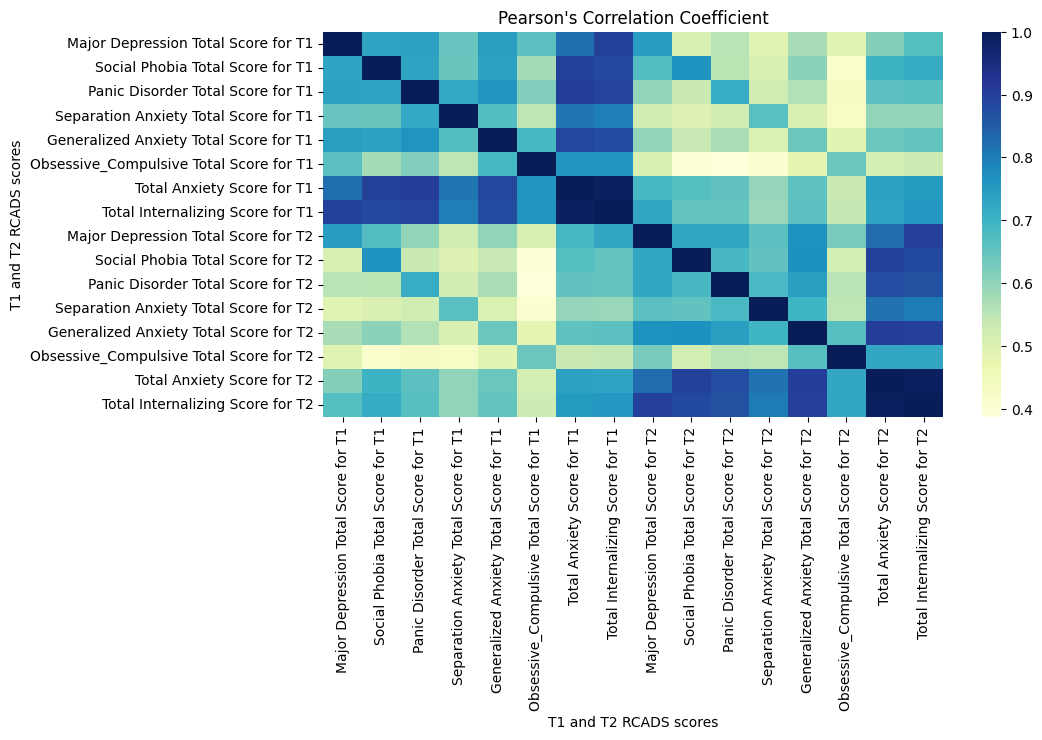

In [50]:
#Heat Map

s = sns.heatmap(corr_array_only_scales, cmap="YlGnBu")
s.set(xlabel = "T1 and T2 RCADS scores", ylabel = "T1 and T2 RCADS scores", title = "Pearson's Correlation Coefficient")
      


In [51]:
print("Corr. between MDD T1 and SP T1=", np.array(corr_array_only_scales)[0,1] )
print("Corr. between MDD T1 and GAD T1=", np.array(corr_array_only_scales)[0,4] )
print("Corr. between MDD T2 and SP T2=", np.array(corr_array_only_scales)[8,9] )
print("Corr. between MDD T2 and GAD T2=", np.array(corr_array_only_scales)[8,12] )

Corr. between MDD T1 and SP T1= 0.7298855043344671
Corr. between MDD T1 and GAD T1= 0.7435268419772915
Corr. between MDD T2 and SP T2= 0.7238946828341891
Corr. between MDD T2 and GAD T2= 0.7659432394903686


**Scatter Plots:**

The Pearson's Correlation Co-efficient between Interview Age for T2 and Major Depressive Disorder Total Score for T2 = 0.2752054579688234 .


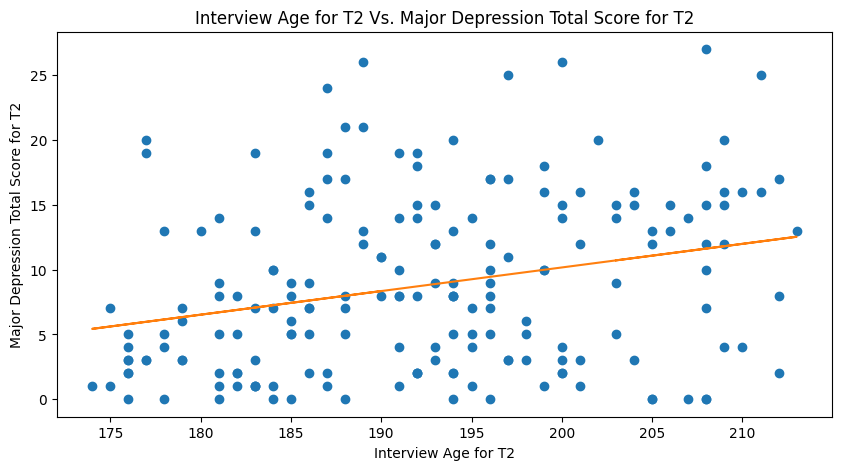

The Pearson's Correlation Co-efficient between Major Depression Total Score for T1 and Major Depressive Disorder Total Score for T2 = 0.7451029002376913 .


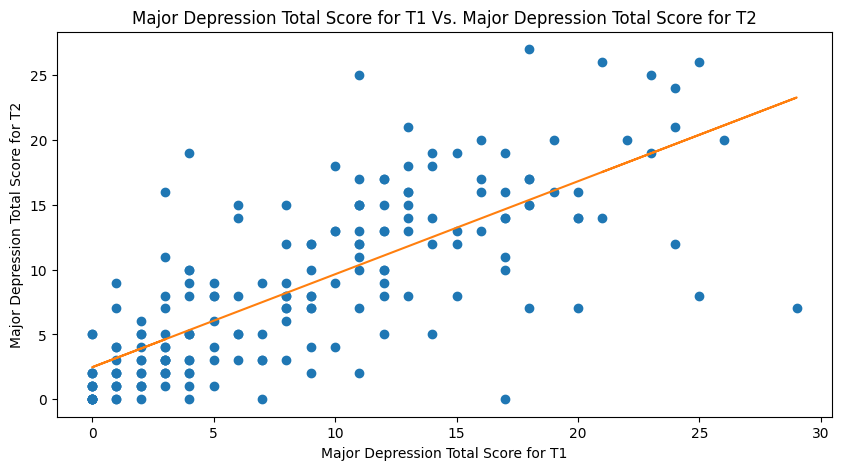

In [52]:
plot_indices = [11,3,12] #input (except sex since it's categorical) and target indices

Clinical_Data_Clean_for_T2_for_plots = Clinical_Data_Clean_for_T2[Clinical_Data_Clean_for_T2.columns[plot_indices]].astype(int)

for i in range(len(plot_indices)-1):
    
    corr = np.corrcoef(Clinical_Data_Clean_for_T2_for_plots.iloc[:,i], Clinical_Data_Clean_for_T2_for_plots.iloc[:,-1])
        
    print("The Pearson's Correlation Co-efficient between",Clinical_Data_Clean_for_T2_for_plots.columns[i] , "and Major Depressive Disorder Total Score for T2 =", corr[0,1], ".")
    
    fig, ax = plt.subplots(1,1)
            
    plt.plot(Clinical_Data_Clean_for_T2_for_plots.iloc[:,i], Clinical_Data_Clean_for_T2_for_plots.iloc[:,-1],'o')
            
    #obtain m (slope) and b(intercept) of linear regression line
    m, b = np.polyfit(Clinical_Data_Clean_for_T2_for_plots.iloc[:,i],Clinical_Data_Clean_for_T2_for_plots.iloc[:,-1], 1)
            
    #add linear regression line to scatterplot 
    plt.plot(Clinical_Data_Clean_for_T2_for_plots.iloc[:,i], m*Clinical_Data_Clean_for_T2_for_plots.iloc[:,i]+b, label = 'Linear Regression Line')
        
    plt.xlabel(Clinical_Data_Clean_for_T2_for_plots.columns[i])
        
    plt.ylabel("Major Depression Total Score for T2")
        
    plt.title(Clinical_Data_Clean_for_T2_for_plots.columns[i]+" Vs. Major Depression Total Score for T2")
            
    plt.show()
    

The point-biserial correlation coefficient between Sex and Major Depression Total Score for T2 = 0.3410791354716445 .
The mean and standard deviation of MDD Total Score in T2 for female participants are 5.65625 and 4.99443049180785 respectively.
The mean and standard deviation of MDD Total Score in T2 for male participants are 10.438016528925619 and 6.847684729051647 respectively.


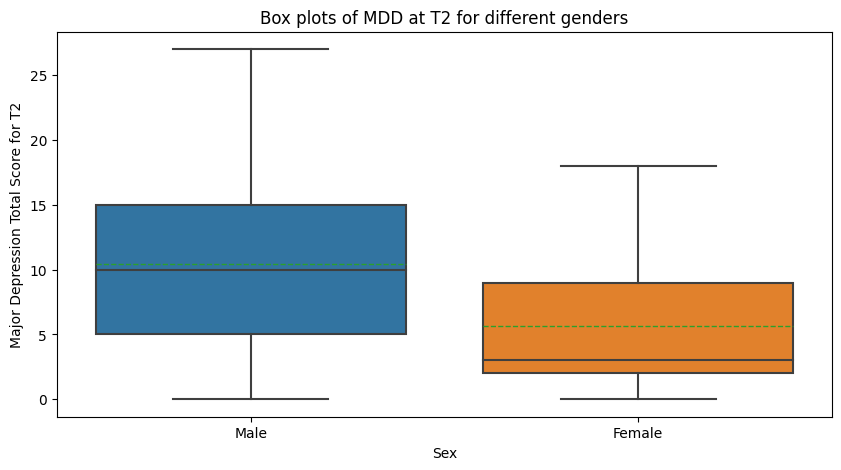

In [53]:
data1 = Clinical_Data_Clean_for_T2[Clinical_Data_Clean_for_T2['Female'] ==1]['Major Depression Total Score for T2']
data2 = Clinical_Data_Clean_for_T2[Clinical_Data_Clean_for_T2['Female'] ==0]['Major Depression Total Score for T2']

data=[data1, data2]

s_box = sns.boxplot(data, showmeans=True, meanline=True)
s_box.set(xlabel = "Sex", ylabel = "Major Depression Total Score for T2", title = "Box plots of MDD at T2 for different genders")
s_box.set_xticklabels(['Male', 'Female'])

means = [np.mean(d) for d in data]
stds = [np.std(d) for d in data]


from scipy.stats import pointbiserialr

# Calculate the point-biserial correlation coefficient #r_pb = (M1 - M0) / (SD * sqrt(p * (1 - p)))
r_pb, p_value = pointbiserialr(Clinical_Data_Clean_for_T2['Female'], Clinical_Data_Clean_for_T2['Major Depression Total Score for T2'])

print("The point-biserial correlation coefficient between Sex and Major Depression Total Score for T2 =",r_pb,".")
print("The mean and standard deviation of MDD Total Score in T2 for female participants are",means[1], "and", stds[1],"respectively.")
print("The mean and standard deviation of MDD Total Score in T2 for male participants are",means[0], "and", stds[0],"respectively.")



In [54]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [55]:
import statsmodels.api as sm

# Fit linear regression model
X = np.asarray(Clinical_Data_Clean_for_T2['Female'])
y = np.asarray(Clinical_Data_Clean_for_T2['Major Depression Total Score for T2'])
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print regression coefficients
print(model.params)

[5.65625 4.781766528925625]
